In [1]:
import pandas as pd
import numpy as np


In [3]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


For the dictionary of this dataset pleaserefer to https://archive.ics.uci.edu/ml/datasets/Spambase

In [4]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']


In [5]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is not bad!

0.917376880017
0.0819709460696


In [7]:
SpamData['is_spam'].describe()  #We love misclassification error even more! (39%) of e-mails were spam

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_spam, dtype: float64

In [11]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
cm = confusion_matrix(y, y_hat)
print cm[0][0]
print cm

2662
[[2662  126]
 [ 186 1627]]


#### How much is our FPR, TPR, TNR, FNR? 

Answer: 

#### How much is our current intercept?

In [8]:
lm.intercept_

array([-1.44907502])

#### In our current setting 39% of our data was Spam. How would you adjust your model if you knew that in reality only 10% of e-mails are spam?

Answer: Adjust Intercept

In [12]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(y_hat_probability)
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)  #an excellent value!

[ 0.59630183  0.97267762  0.99997911 ...,  0.03591243  0.09639724
  0.04595059]
0.975490756619


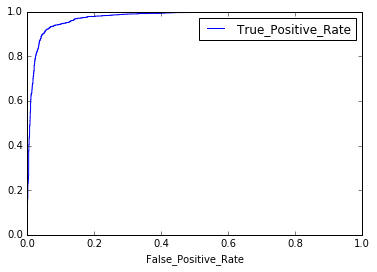

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #beautiful Graph


#### Now let's find out the most important variables

In [14]:
# let's first standardize our data
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = X.columns.values
for i in NameOfVariables:
    SpamData[i] = Standardize(SpamData[i])
X = SpamData[ListOfAllVariables]
del X['is_spam']  

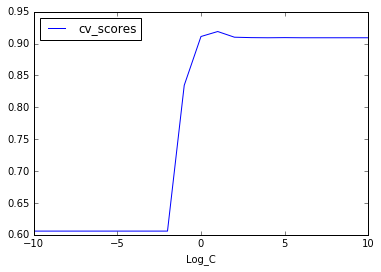

In [12]:
# Try testing and plot
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,penalty = "l1") #L1 means Absolute values, which invokes Lasso Regression
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )

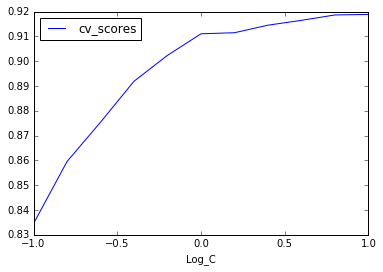

In [15]:
# Try testing and plot
c_list = np.logspace(-1,1,11) 
c_index = np.linspace(-1,1,11)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )
# it sounds like we can choose C = 0 - C =1 is actually better but we would like to keep the smallest C that is
# good in comparison to our best possible outcome. The SIMPLER THE BETTER! SMALLER C's GIVE YOU MORE RESTRICTIVE
# OUTPUTS - BETTER INTERPRETATION

In [23]:
lm = LogisticRegression(C = 10**(0), penalty = "l1")
lm.fit(X,y)
rs = []
for i in zip(X.columns.values, lm.coef_[0]):
    if abs(i[1]) < 0.0001:
        rs.append(i[0])
#Word_freq_receive, Word_freq_people, Word_freq_telnet, Word_freq_857, Word_freq_415, WOrd_freq_85, Word_freq_parts,
#Word_freq_

In [15]:
Var_coef = zip(lm.coef_[0,:],NameOfVariables)
print Var_coef

[(-0.53577533961266, 'word_freq_make'), (-1.137028241853729, 'word_freq_address'), (0.93284956393468144, 'word_freq_all'), (1.6384616522235786, 'word_freq_3d'), (4.9706798596476061, 'word_freq_our'), (3.0880009870009664, 'word_freq_over'), (16.492827809407888, 'word_freq_remove'), (5.1492954121841592, 'word_freq_internet'), (3.0691567348772351, 'word_freq_order'), (1.1100954780531862, 'word_freq_mail'), (0.0, 'word_freq_receive'), (-1.2383773101915796, 'word_freq_will'), (0.0, 'word_freq_people'), (0.014591532039642028, 'word_freq_report'), (1.9357950574954854, 'word_freq_addresses'), (16.156798443373102, 'word_freq_free'), (6.0096085338952783, 'word_freq_business'), (1.9070169436783186, 'word_freq_email'), (1.4739127271126413, 'word_freq_you'), (4.9251431481109673, 'word_freq_credit'), (2.7345868921951357, 'word_freq_your'), (4.3739675212037676, 'word_freq_font'), (11.963399156206874, 'word_freq_000'), (5.6927168662959851, 'word_freq_money'), (-27.780194101847066, 'word_freq_hp'), (-6

In [16]:
sorted(Var_coef)

[(-28.733212277055699, 'word_freq_george'),
 (-27.780194101847066, 'word_freq_hp'),
 (-15.232647128520181, 'word_freq_edu'),
 (-11.852830743965953, 'word_freq_meeting'),
 (-9.6903109096320179, 'word_freq_re'),
 (-6.7707207797535487, 'word_freq_hpl'),
 (-5.7393742306965967, 'word_freq_data'),
 (-3.9627214871065628, 'word_freq_project'),
 (-3.3668268303026361, 'word_freq_cs'),
 (-3.3230718335561313, 'char_freq_;'),
 (-1.8641317304097049, 'word_freq_conference'),
 (-1.5537526330733111, 'word_freq_pm'),
 (-1.4224805890714847, 'word_freq_table'),
 (-1.3714837327629834, 'word_freq_original'),
 (-1.2383773101915796, 'word_freq_will'),
 (-1.137028241853729, 'word_freq_address'),
 (-0.86033424296667915, 'word_freq_1999'),
 (-0.62842989447332442, 'word_freq_labs'),
 (-0.53577533961266, 'word_freq_make'),
 (-0.4901777261802604, 'word_freq_lab'),
 (0.0, 'capital_run_length_longest'),
 (0.0, 'char_freq_#'),
 (0.0, 'char_freq_('),
 (0.0, 'char_freq_['),
 (0.0, 'word_freq_415'),
 (0.0, 'word_freq_85'

It seems like char_freq_$ has the highest effect on an email be a spam, the next word that highly affects the probability of spam is remove, followed by  free, 000, b !, etc.

The most unlikely characters that are in spam emails are george, hp, edu, meeting, etc.. 

12 words  and characters - with coefficients 0 - have mixed effect on probability of spam and ham. 

#### Now let's look at ROC, AUC, confusion matrix of our optimal model

In [25]:
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

array([[2666,  122],
       [ 262, 1551]])

[ 0.48494356  0.94170665  0.99798118 ...,  0.09795948  0.17408575
  0.10084486]
0.970620977462


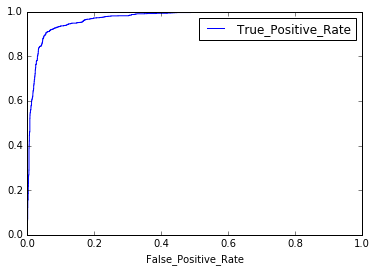

In [27]:
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(y_hat_probability)
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #agian beautiful Graph

#### Now let's play with threshold

In [33]:
def PredictThreshold(Predictprob,Threshhold):
    y_predict = 0
    if (Predictprob >= Threshhold):
        y_predict = 1
    return y_predict

PredictThreshold(0.5,0.9)
y_hat_probability = lm.predict_proba(X).T[1]
y_hat_predict_threshold = []
threshold = 0.60
for i in range(0,len(y_hat_probability)):
    y_hat_predict_threshold.append(PredictThreshold(y_hat_probability[i],threshold))

confusion_matrix(y, y_hat_predict_threshold)    
    
#please play with threshold and discuss your outputs. For example if it is really important
#for you to reduce FP, what should you do?

array([[2702,   86],
       [ 362, 1451]])